In [1]:
import pandas as pd

df_raw = pd.read_csv('../images/train_annotations.csv')
df_raw['boneage_category'] = pd.cut(df_raw['boneage'], 10)
df_raw['male_numeric'] = df_raw.apply(lambda row: 1 if row[['male']].bool() else 0, axis=1)
df_raw

,id,img_path,img_preprocessed_path,boneage,male,boneage_category,male_numeric
0,1379,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,94,False,"(91.8, 114.5]",0
1,1380,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,120,True,"(114.5, 137.2]",1
2,1381,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,82,False,"(69.1, 91.8]",0
3,1387,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,138,True,"(137.2, 159.9]",1
4,1388,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,126,False,"(114.5, 137.2]",0
...,...,...,...,...,...,...,...
9130,15604,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,168,True,"(159.9, 182.6]",1
9131,15605,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,50,False,"(46.4, 69.1]",0
9132,15606,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,113,False,"(91.8, 114.5]",0
9133,15608,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,55,False,"(46.4, 69.1]",0


array([[<AxesSubplot:title={'center':'boneage'}>,
        <AxesSubplot:title={'center':'male_numeric'}>]], dtype=object)

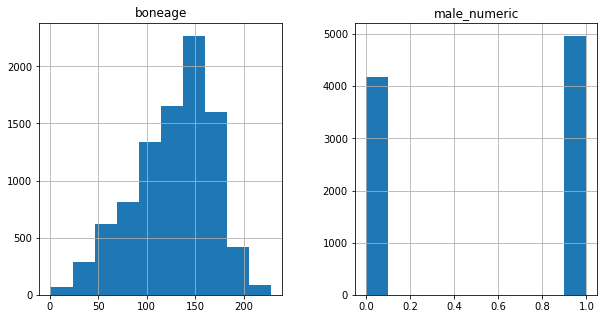

In [2]:
df_raw[['boneage', 'male_numeric']].hist(figsize = (10, 5))

New Data Size: 22000 Old Size: 9135


array([[<AxesSubplot:title={'center':'boneage'}>,
        <AxesSubplot:title={'center':'male_numeric'}>]], dtype=object)

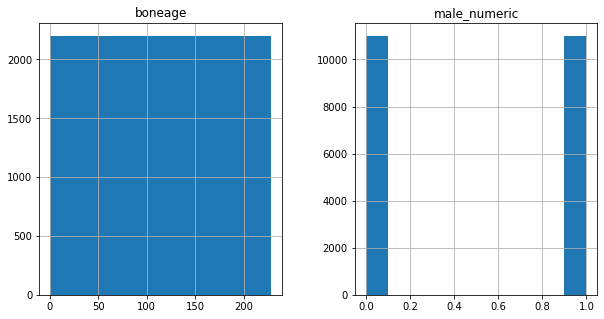

In [3]:
df = df_raw.groupby(['boneage_category', 'male_numeric']).apply(
    lambda x: x.sample(1100, replace = True)).reset_index(drop = True)
print('New Data Size:', df.shape[0], 'Old Size:', df_raw.shape[0])
df[['boneage', 'male_numeric']].hist(figsize = (10, 5))

In [4]:
df.sort_values('id')

,id,img_path,img_preprocessed_path,boneage,male,boneage_category,male_numeric
9199,1379,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,94,False,"(91.8, 114.5]",0
9102,1379,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,94,False,"(91.8, 114.5]",0
8910,1379,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,94,False,"(91.8, 114.5]",0
12886,1380,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,120,True,"(114.5, 137.2]",1
7565,1381,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,82,False,"(69.1, 91.8]",0
...,...,...,...,...,...,...,...
9646,15606,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,113,False,"(91.8, 114.5]",0
5194,15608,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,55,False,"(46.4, 69.1]",0
4402,15608,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,55,False,"(46.4, 69.1]",0
4677,15608,C:/Users/marvi/data/dev/deeplearning-playgroun...,NaN,55,False,"(46.4, 69.1]",0
